In [59]:
import random

import pandas as pd

If a user is active on 2 random days in a month, what is the cumulative probability for each day in a month that the user was active on a previous day?

In [30]:
days = range(1, 31)
iterations = 10_000_000

day_1_selections = 0
for i in range(iterations):
    sample = random.sample(days, 2)
    if 1 in sample:
        day_1_selections += 1
        
day_1_selections / iterations

0.0666948

In [32]:
p_active_on_given_day = 2/30
p_active_on_given_day

0.06666666666666667

In [44]:
cumulative_probability = pd.Series([None for i in range(30)], index=range(1, 31))

In [45]:
cumulative_probability[1] = 0
cumulative_probability[2] = p_active_on_given_day

In [46]:
for d in range(3, 31):
    previous_probability = cumulative_probability[d-1]
    cumulative_probability[d] = (
        # option: it before yesterday
        previous_probability
        # option: it happens yesterday for the first time
        + (1 - previous_probability) * 2 / (30 - (d - 2))
    )

In [47]:
cumulative_probability

1            0
2     0.066667
3     0.131034
4     0.193103
5     0.252874
6     0.310345
7     0.365517
8     0.418391
9     0.468966
10    0.517241
11    0.563218
12    0.606897
13    0.648276
14    0.687356
15    0.724138
16    0.758621
17    0.790805
18     0.82069
19    0.848276
20    0.873563
21    0.896552
22    0.917241
23    0.935632
24    0.951724
25    0.965517
26    0.977011
27    0.986207
28    0.993103
29    0.997701
30         1.0
dtype: object

In [69]:
# These numbers (8.8 M for average daily uniques and 131 M for average monthly uniques) come
# from India, across all Wikipedias, during 2022-23Q4
monthly_uniques_on_given_day = 8_797_250 + cumulative_probability * (131_119_845 - 8_797_250)
monthly_uniques_on_given_day.map(int)

1       8797250
2      16952089
3      24825727
4      32418164
5      39729400
6      46759434
7      53508267
8      59975898
9      66162329
10     72067557
11     77691585
12     83034411
13     88096035
14     92876458
15     97375680
16    101593701
17    105530520
18    109186138
19    112560554
20    115653769
21    118465783
22    120996595
23    123246206
24    125214616
25    126901824
26    128307831
27    129432636
28    130276240
29    130838643
30    131119845
dtype: int64

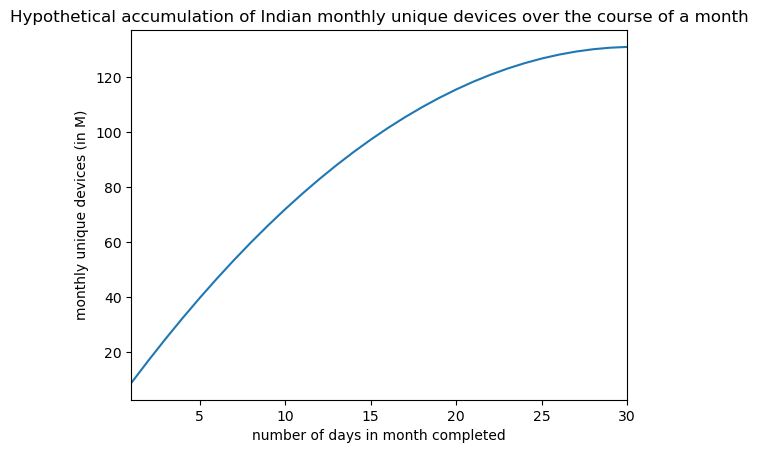

In [68]:
ax = (monthly_uniques_on_given_day / 1_000_000).plot(
    xlim=(1, 30),
    title="Hypothetical accumulation of Indian monthly unique devices over the course of a month",
    xlabel="number of days in month completed",
    ylabel="monthly unique devices (in M)"

)

If one day in a month is removed, this model says that the monthly uniques decreases by 0.2%.

In [56]:
1 - (monthly_uniques_on_given_day[30] / monthly_uniques_on_given_day[29])

-0.0021492225844728097